In [ ]:
from nltk.corpus import wordnet as wn
import nltk
nltk.download('wordnet')

In [ ]:
poses = {'n':'noun','v':'verb','s':'adj (s)','a':'adj','r':'adv'}

for snynet in wn.synsets('good'):
  print('{}{}'.format(poses[snynet.pos()], ', '.join([l.name() for l in snynet.lemmas()])))


noungood
noungood, goodness
noungood, goodness
nouncommodity, trade_good, good
adjgood
adj (s)full, good
adjgood
adj (s)estimable, good, honorable, respectable
adj (s)beneficial, good
adj (s)good
adj (s)good, just, upright
adj (s)adept, expert, good, practiced, proficient, skillful, skilful
adj (s)good
adj (s)dear, good, near
adj (s)dependable, good, safe, secure
adj (s)good, right, ripe
adj (s)good, well
adj (s)effective, good, in_effect, in_force
adj (s)good
adj (s)good, serious
adj (s)good, sound
adj (s)good, salutary
adj (s)good, honest
adj (s)good, undecomposed, unspoiled, unspoilt
adj (s)good
advwell, good
advthoroughly, soundly, good


In [ ]:
panda = wn.synset('panda.n.01')
hyper = lambda s: s.hypernyms()
list(panda.closure(hyper))

[Synset('procyonid.n.01'),
 Synset('carnivore.n.01'),
 Synset('placental.n.01'),
 Synset('mammal.n.01'),
 Synset('vertebrate.n.01'),
 Synset('chordate.n.01'),
 Synset('animal.n.01'),
 Synset('organism.n.01'),
 Synset('living_thing.n.01'),
 Synset('whole.n.02'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

#### Gensim word vector visualazation of various word vectors (Çeşitli kelime vektörlerinin Gensim kelime vektörü görselleştirmesi)

In [1]:
import numpy as np
%matplotlib notebook 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

Kelime vektörlerine bakmak için Gensim kullanacağım. Ayrıca kelime vektörleri için hw1'de kullanıyoruz. Gensim gerçekten bir derin öğrenme paketi değil. (LDA tarzı) konu modelleriyle başlayan ve SVD ve sinirsel kelime temsillerine dönüşen kelime ve metin benzerliği modellemesi için bir pakettir. Ancak verimli, ölçeklenebilir ve oldukça yaygın olarak kullanılmaktadır.

Yerli Stanford teklifimiz GloVe kelime vektörleridir. Gensim onlara birinci sınıf destek vermez, ancak GloVe vektörlerinden oluşan bir dosyayı word2vec formatına dönüştürmenize izin verir. GloVe vektörlerini Glove sayfasından indirebilirsiniz. Onlar bu zip dosyasının içindeler

(Aşağıdaki 100 boyut vektörlerini hız ve küçüklük ile kalite arasında bir karışım olarak kullanıyorum. 50d vektörlerini denerseniz, temelde benzerlik için çalışırlar ancak açıkça analoji sorunları için o kadar iyi değiller. 300d vektörleri yüklerseniz, bunlar 100d vektörlerinden bile daha iyi.)

Gensim glove desteklemediğinden dolayı glove2word2vec işlevini kullanırız bundan sonra daha önce eğitilmiş bir kelime vektörü modeline bu verileri yükledik

KeyedVectors dedikleri sadece kelimelerin bulunduğu ve bunların sabit bir şekilde durduğu vektördür. herşey içeren büyük bir sözlük gibidir.

In [4]:
glove_file = datapath('/content/drive/MyDrive/dataset/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [6]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [8]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.927285373210907),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875633478164673),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.751889705657959),
 ('romney', 0.7488929629325867),
 ('kerry', 0.7472623586654663)]

In [11]:
model.most_similar('besiktas')

[('fenerbahce', 0.8933534622192383),
 ('galatasaray', 0.826630175113678),
 ('trabzonspor', 0.7777950167655945),
 ('bursaspor', 0.7516205310821533),
 ('olympiakos', 0.664461612701416),
 ('panathinaikos', 0.6559538841247559),
 ('shakhtar', 0.6422659158706665),
 ('cska', 0.6336450576782227),
 ('aek', 0.6329329609870911),
 ('sepahan', 0.6326301693916321)]

In [12]:
model.most_similar(negative='banana')

[('keyrates', 0.7173938751220703),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720890045166),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434212684631),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905653476715088),
 ('maurilio', 0.6865653395652771)]

In [18]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [19]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [20]:
analogy('japan', 'japanese', 'australia')

'australian'

In [21]:
analogy('australia', 'beer', 'france')

'champagne'

In [25]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [26]:
analogy('tall', 'tallest', 'long')

'longest'

In [27]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [28]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [29]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

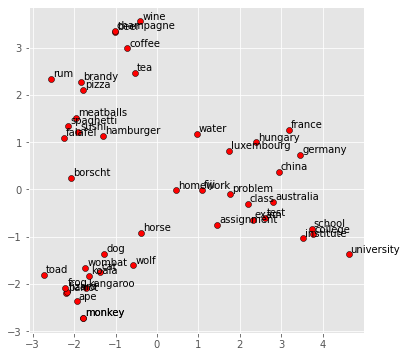

In [30]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

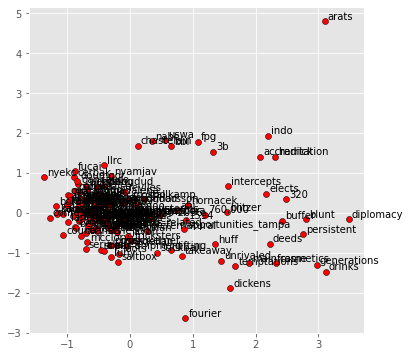

In [32]:
display_pca_scatterplot(model, sample=150)